# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

import warnings
warnings.filterwarnings("ignore")
print("All files loaded")

All files loaded


In [3]:
df = pd.read_csv("/Users/vijayc/Downloads/practical_application_II_starter/data/vehicles.csv")
dfOrig = pd.read_csv("/Users/vijayc/Downloads/practical_application_II_starter/data/vehicles.csv")


In [5]:
dfOrig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [7]:
display(df.sample(5))

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
168686,7316378552,wichita,3500,1971.0,gmc,NaN,NaN,8 cylinders,gas,45160.0,clean,automatic,NaN,rwd,full-size,truck,white,ks
66178,7306246236,stockton,14777,2016.0,chevrolet,malibu limited,NaN,4 cylinders,gas,74556.0,clean,automatic,1G11C5SA7GU162654,fwd,NaN,sedan,NaN,ca
90163,7314301675,"washington, DC",0,2016.0,ford,f-150 xlt supercrew 6.5-ft,excellent,NaN,gas,92515.0,clean,automatic,1FTEW1EP5GFC26249,4wd,NaN,truck,red,dc
292280,7316296616,cleveland,9988,2012.0,gmc,terrain,excellent,4 cylinders,gas,77262.0,clean,automatic,2GKALSEK6C6186063,fwd,mid-size,SUV,silver,oh
104671,7315914199,orlando,28990,2018.0,bmw,i3 s w/range extender,good,NaN,electric,12514.0,clean,other,WBY7Z8C54JVB87145,rwd,NaN,hatchback,blue,fl


In [9]:
df['price'] = df['price'].fillna(df['price'].mean())
df = df[~np.isinf(df['price'])]
print(df)

                id                  region  price    year manufacturer  \
0       7222695916                prescott   6000     NaN          NaN   
1       7218891961            fayetteville  11900     NaN          NaN   
2       7221797935            florida keys  21000     NaN          NaN   
3       7222270760  worcester / central MA   1500     NaN          NaN   
4       7210384030              greensboro   4900     NaN          NaN   
...            ...                     ...    ...     ...          ...   
426875  7301591192                 wyoming  23590  2019.0       nissan   
426876  7301591187                 wyoming  30590  2020.0        volvo   
426877  7301591147                 wyoming  34990  2020.0     cadillac   
426878  7301591140                 wyoming  28990  2018.0        lexus   
426879  7301591129                 wyoming  30590  2019.0          bmw   

                           model condition    cylinders    fuel  odometer  \
0                            NaN  

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [13]:
has_nan = df['price'].isna().any().sum() 
has_inf = np.isinf(df['price']).any().sum()
df_cleaned = df[~np.isinf(df['price'])]
has_inf = np.isinf(df_cleaned['price']).any().sum()
print(has_nan)
print(has_inf)

0
0


In [15]:
df.isna().sum() ## There are lot of missing values 

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [17]:
df.isna().mean().round(4)*100

id               0.00
region           0.00
price            0.00
year             0.28
manufacturer     4.13
model            1.24
condition       40.79
cylinders       41.62
fuel             0.71
odometer         1.03
title_status     1.93
transmission     0.60
VIN             37.73
drive           30.59
size            71.77
type            21.75
paint_color     30.50
state            0.00
dtype: float64

In [19]:
sum(df.duplicated()) ## O duplicates found

0

In [21]:
df.shape[0]

426880

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [24]:
pd.set_option('display.float_format', '{:.2f}'.format)
df[['price']].describe()

,price
count,426880.00
mean,75199.03
std,12182282.17
min,0.00
25%,5900.00
50%,13950.00
75%,26485.75
max,3736928711.00


In [26]:
p = [0.05, 0.85, 0.95, 0.99]
df[['price']].describe(p)

,price
count,426880.00
mean,75199.03
std,12182282.17
min,0.00
5%,0.00
50%,13950.00
85%,32995.00
95%,44500.00
99%,66995.00
max,3736928711.00


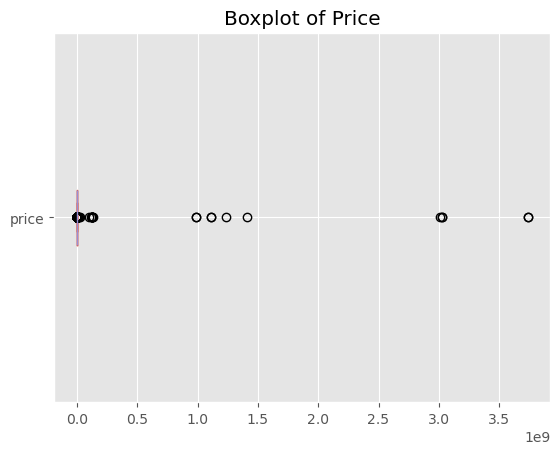

In [28]:
df['price'].plot(kind = 'box', vert = False, title = 'Boxplot of Price');

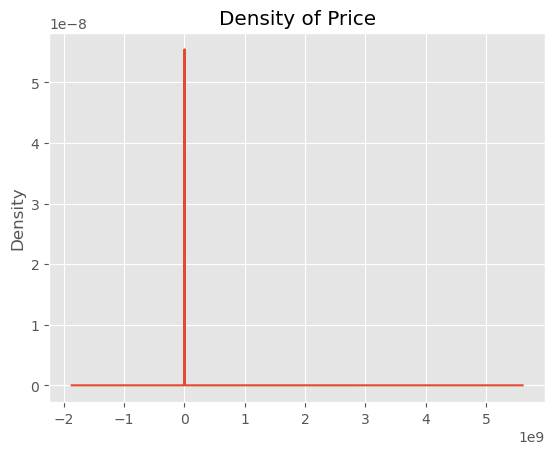

In [30]:
df['price'].plot(kind = 'density', title = 'Density of Price');

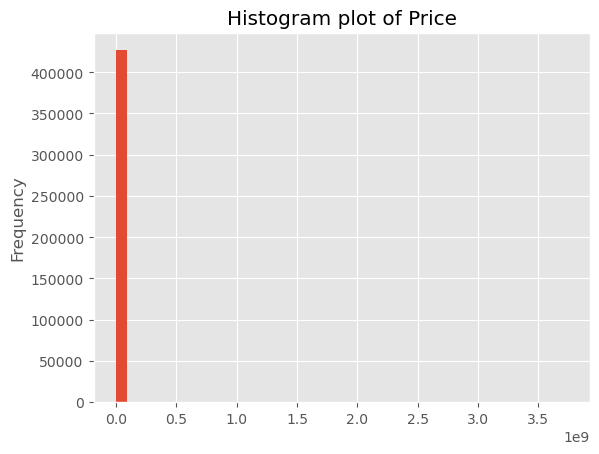

In [32]:
df['price'].plot(kind = 'hist', bins = 40, title = 'Histogram plot of Price');

In [34]:
#df['price'] = df['price'].fillna(df['price'].mean())
#df = df[~np.isinf(df['price'])]
df['priceLog'] = np.log(df['price'])
df.head(3)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state,priceLog
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,8.70
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,9.38
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,9.95


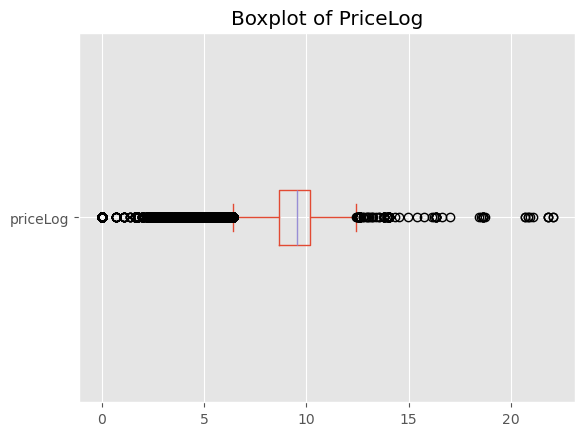

In [36]:
df['priceLog'].plot(kind = 'box', vert = False, title = 'Boxplot of PriceLog');

In [38]:
#has_nan = df['priceLog'].isna().any().sum() 
#has_inf = np.isinf(df['priceLog']).any().sum()
df_cleaned = df[~np.isinf(df['priceLog'])]
#has_inf = np.isinf(df_cleaned['priceLog']).any().sum()
#print(has_nan)
#print(has_inf)

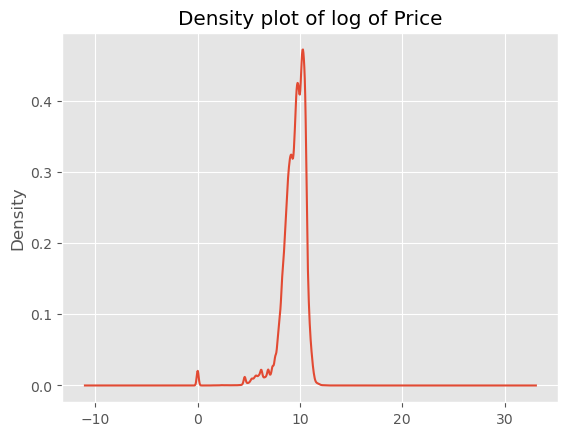

In [40]:
df_cleaned['priceLog'].plot(kind = 'kde', title = 'Density plot of log of Price');

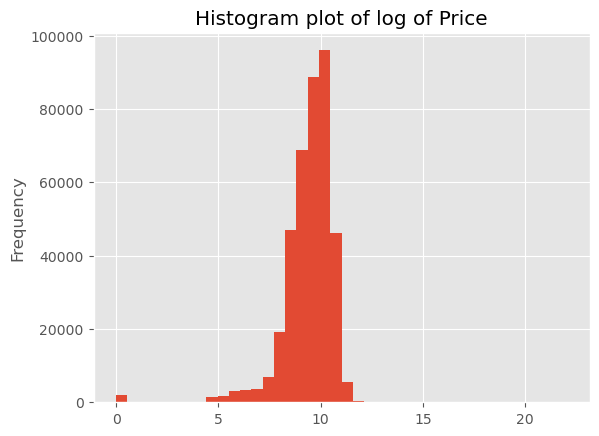

In [42]:
df_cleaned['priceLog'].plot(kind = 'hist', bins = 40, title = 'Histogram plot of log of Price');

In [44]:
#sns.pairplot(df_cleaned)

In [46]:

#df['price'] = df['price'].astype(int)

In [48]:
df.sample(10)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state,priceLog
232310,7315010006,charlotte,29999,2013.00,bmw,m3,NaN,NaN,gas,76577.00,clean,automatic,WBSDX9C54DE785553,NaN,sub-compact,convertible,NaN,nc,10.31
153328,7303286600,indianapolis,26990,2018.00,volkswagen,beetle 2.0t se,good,NaN,gas,18794.00,clean,other,3VW5DAAT9JM506026,fwd,NaN,convertible,NaN,in,10.20
391925,7305096194,harrisonburg,26990,2018.00,alfa-romeo,romeo stelvio sport utility,good,NaN,gas,16757.00,clean,other,ZASFAKAN9J7B88921,NaN,NaN,hatchback,NaN,va,10.20
237785,7309120104,greensboro,0,2015.00,mercedes-benz,gl-class,NaN,8 cylinders,gas,55215.00,clean,automatic,NaN,4wd,mid-size,SUV,white,nc,-inf
81495,7304975847,pueblo,22494,2014.00,chevrolet,camaro,NaN,NaN,gas,95800.00,clean,automatic,2G1FJ1EJ9E9279808,NaN,NaN,other,NaN,co,10.02
190450,7311714940,western massachusetts,2988,2010.00,subaru,legacy,NaN,NaN,gas,206864.00,clean,automatic,4S3BMBE63A3236079,NaN,NaN,sedan,NaN,ma,8.00
327635,7308005391,salem,0,2020.00,chevrolet,silverado 1500,NaN,8 cylinders,gas,14811.00,clean,automatic,3GCNWAEF0LG234923,rwd,NaN,truck,NaN,or,-inf
102904,7310899361,ocala,1,2013.00,mercedes-benz,gl-class,excellent,8 cylinders,gas,79856.00,clean,other,4JGDF7CE3DA133699,4wd,compact,wagon,white,fl,0.00
355767,7308312451,knoxville,19999,2013.00,jeep,wrangler jk unlimited sport,excellent,6 cylinders,gas,173952.00,clean,automatic,NaN,4wd,mid-size,SUV,black,tn,9.90
85291,7306975793,hartford,12000,2009.00,audi,q7 tdi prestige,excellent,6 cylinders,diesel,150339.00,clean,automatic,WA1CM74L89D031365,4wd,NaN,SUV,white,ct,9.39


### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [51]:
df_zscore = df[np.abs(stats.zscore(df['price'])) < 0.5].copy()

In [53]:
df_zscore.shape

(426849, 19)

In [55]:
zscore_data_lost = 1 - (df_zscore.shape[0]/df.shape[0])
print("We lost {:.6%} of the data by the z-score method" .format(zscore_data_lost))

We lost 0.007262% of the data by the z-score method


In [57]:
df_zscore['price'].describe()

count    426849.00
mean      17552.14
std       20667.53
min           0.00
25%        5900.00
50%       13950.00
75%       26455.00
max     5000000.00
Name: price, dtype: float64

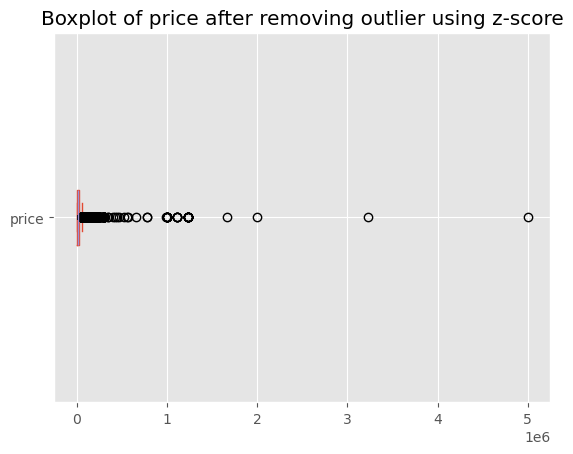

In [59]:
df_zscore['price'].plot(kind = 'box', vert = False, title = "Boxplot of price after removing outlier using z-score");

In [61]:
irq = df['price'].quantile(.75) - df['price'].quantile(.25)
irq

20585.75

In [63]:
lower_bound = df['price'].quantile(.25) - 1.5 * irq
upper_bound = df['price'].quantile(.75) + 1.5 * irq
df_irq = df[(df['price'] > lower_bound) & (df['price'] > upper_bound)].copy()

In [65]:
irq_data_lost = 1 - (df_irq.shape[0]/df.shape[0])
print("We lost {:.2%} of the data by the IRQ method" .format(irq_data_lost))

We lost 98.08% of the data by the IRQ method


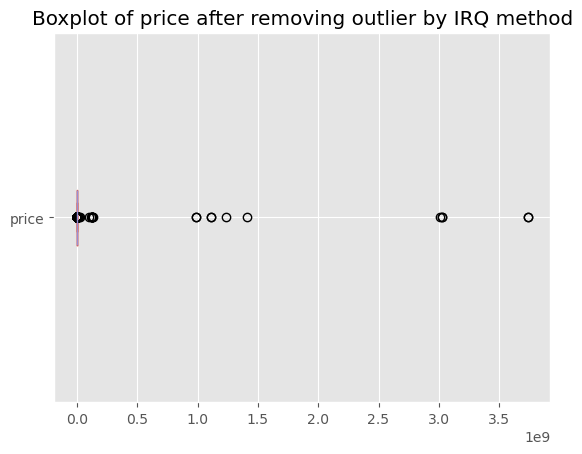

In [67]:
df_irq['price'].plot(kind = 'box' , vert = False, title = "Boxplot of price after removing outlier by IRQ method");

In [69]:
df_irq['price'].describe()

count         8177.00
mean       3088930.26
std       87973256.90
min          57400.00
25%          61000.00
50%          67995.00
75%          77999.00
max     3736928711.00
Name: price, dtype: float64

<Axes: xlabel='odometer', ylabel='price'>

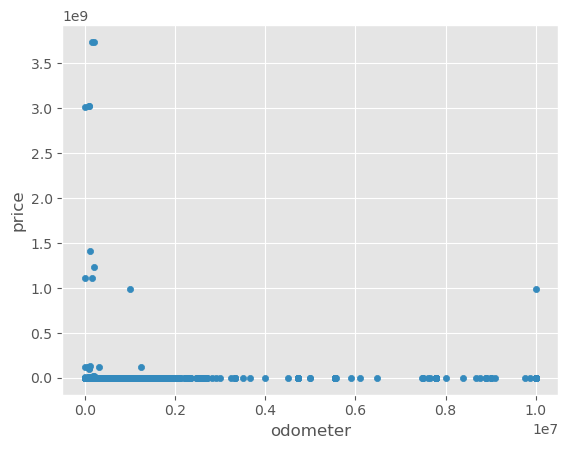

In [71]:
df.plot(kind = 'scatter', x = "odometer" , y = "price")

<Axes: >

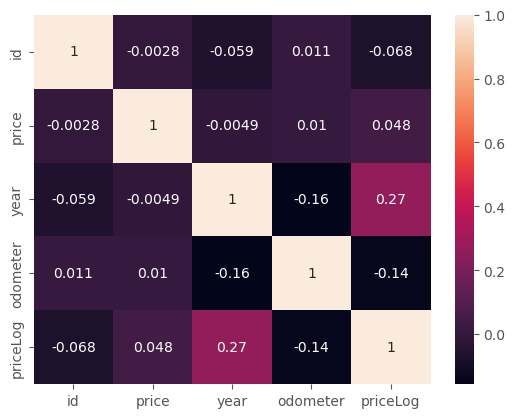

In [73]:
correlation = df.corr(numeric_only = True)
sns.heatmap(correlation, annot = True)

<Axes: >

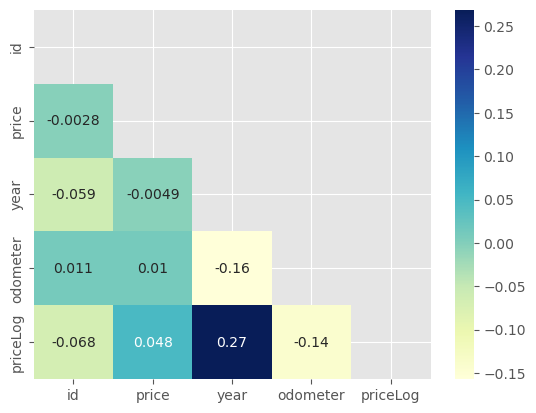

In [75]:
mask = np.triu(np.ones_like(df.corr(numeric_only = True).round(2)))
sns.heatmap(correlation, annot=True, mask=mask, cmap="YlGnBu")

In [77]:
#sns.pairplot(df[0:300])

In [79]:
df['title_status'].unique()

array([nan, 'clean', 'rebuilt', 'lien', 'salvage', 'missing',
       'parts only'], dtype=object)

In [81]:
df['transmission'].unique()

array([nan, 'other', 'automatic', 'manual'], dtype=object)

In [83]:
df['condition'].unique()

array([nan, 'good', 'excellent', 'fair', 'like new', 'new', 'salvage'],
      dtype=object)

In [85]:
df.groupby('transmission')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
transmission,,,,,,,,
automatic,336524.00,74881.00,13113970.10,0.00,4999.00,11450.00,22775.00,3736928711.00
manual,25118.00,198416.34,14747142.05,0.00,4500.00,9000.00,18995.00,1410065407.00
other,62682.00,30003.79,495473.78,0.00,20590.00,27990.00,34990.00,123456789.00


In [87]:
df.groupby('title_status')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
title_status,,,,,,,,
clean,405117.00,78443.78,12505181.30,0.00,5959.00,13997.00,26990.00,3736928711.00
lien,1422.00,22424.00,22006.34,0.00,10500.00,17877.50,29000.00,554900.00
missing,814.00,21650.31,142278.98,0.00,1000.00,2500.00,6000.00,1234567.00
parts only,198.00,11503.50,118352.96,0.00,500.00,1200.00,3000.00,1666666.00
rebuilt,7219.00,15093.01,200176.07,0.00,6500.00,10300.00,16000.00,17000000.00
salvage,3868.00,10269.27,21421.13,0.00,3800.00,7000.00,12900.00,1000000.00


In [89]:
df.groupby('condition')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
excellent,101467.00,51346.83,11731431.48,0.00,5999.50,10995.00,18990.00,3736928711.00
fair,6769.00,761090.01,47857081.19,0.00,1500.00,2800.00,4900.00,3736928711.00
good,121456.00,32545.20,3228825.93,0.00,7900.00,19995.00,30990.00,1111111111.00
like new,21178.00,36402.04,1516448.97,0.00,6800.00,13950.00,25000.00,135008900.00
new,1305.00,23657.27,26895.25,0.00,1000.00,15900.00,35114.00,182000.00
salvage,601.00,3605.53,4706.32,0.00,950.00,1800.00,4500.00,35989.00


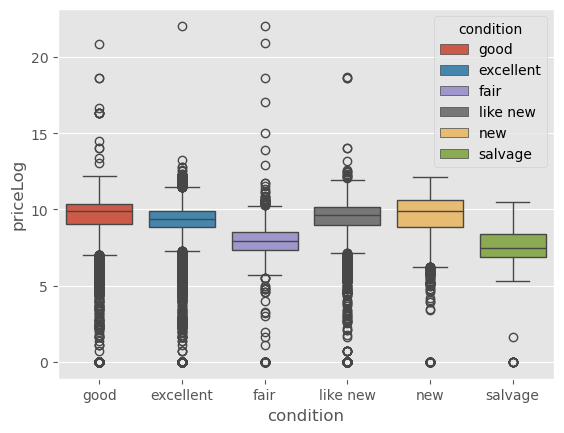

In [91]:
sns.boxplot(x = 'condition', y = 'priceLog', data = df, hue = 'condition');

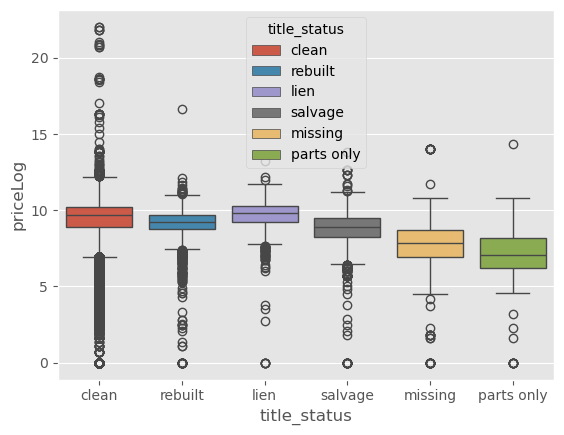

In [93]:
sns.boxplot(x = 'title_status', y = 'priceLog', data = df, hue = 'title_status');

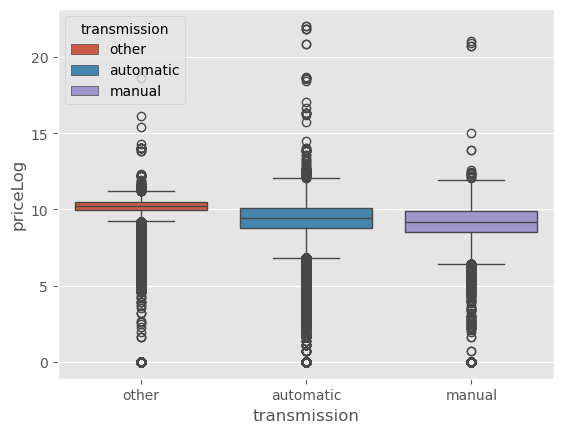

In [95]:
sns.boxplot(x = 'transmission', y = 'priceLog', data = df, hue = 'transmission');

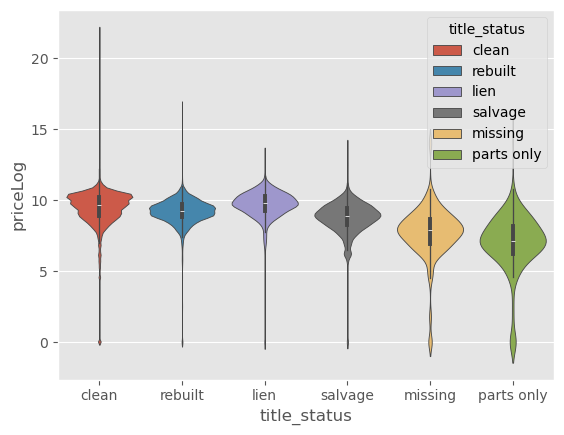

In [97]:
sns.violinplot(x = 'title_status', y = 'priceLog', data = df, hue = 'title_status');

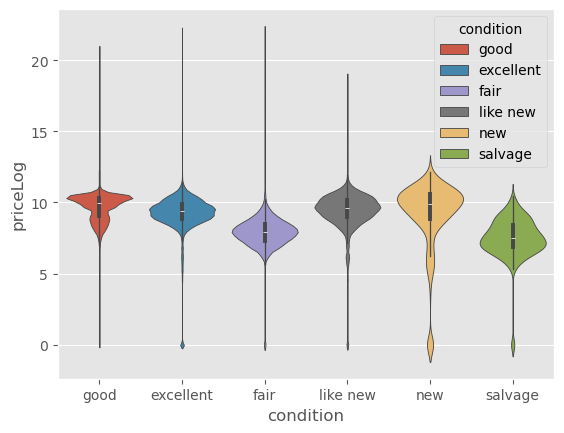

In [99]:
sns.violinplot(x = 'condition', y = 'priceLog', data = df, hue = 'condition');

In [101]:
df.select_dtypes(['int','float']).drop(columns = {'year', 'priceLog'}).head(3)

,id,price,odometer
0,7222695916,6000,NaN
1,7218891961,11900,NaN
2,7221797935,21000,NaN


In [103]:
numeric_col = df.select_dtypes(['int','float']).drop(columns = {'id', 'year', 'priceLog'}).columns.tolist()
df_numeric = df[numeric_col].copy()
df_numeric.sample(5)

,price,odometer
248515,19000,582360.00
147991,0,80000.00
22286,58990,22177.00
287037,3000,113789.00
233116,25750,141601.00


In [105]:
numeric_col

['price', 'odometer']

In [107]:
df_numeric.isna().mean()

price      0.00
odometer   0.01
dtype: float64

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [110]:
X = df_numeric.drop(columns = 'price')
y = df_numeric['price']

In [112]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 1 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   odometer  422480 non-null  float64
dtypes: float64(1)
memory usage: 3.3 MB


In [114]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 426880 entries, 0 to 426879
Series name: price
Non-Null Count   Dtype
--------------   -----
426880 non-null  int64
dtypes: int64(1)
memory usage: 3.3 MB


In [116]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20,random_state=23)

In [118]:
print(X_train.shape)
print(X_test.shape)
print("#" * 20)
print(y_train.shape)
print(y_test.shape)

(341504, 1)
(85376, 1)
####################
(341504,)
(85376,)


In [120]:
print(X_train.isna().sum())

odometer    3524
dtype: int64


In [122]:
print(X_test.isna().sum())

odometer    876
dtype: int64


In [124]:
from sklearn import set_config
set_config(transform_output="pandas")
from sklearn.impute import SimpleImputer

In [126]:
si = SimpleImputer(strategy = "median")
X_train = si.fit_transform(X_train)

X_test = si.transform(X_test)


In [128]:
print(X_train.isna().sum())
print(X_test.isna().sum())

odometer    0
dtype: int64
odometer    0
dtype: int64


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [131]:
y.mean().round(1)

75199.0

In [133]:
from sklearn.dummy import DummyRegressor
dummy = DummyRegressor()

In [135]:
dummy.fit(X_train,y_train)
dummy_r2 = dummy.score(X_train,y_train)
print("The value of dummy_r2 is {: 2f}".format(dummy_r2))

dummy_predict = dummy.predict(X_test)
dummy_rmse = mean_squared_error(y_test, dummy_predict, squared =False)
print("The value of dummy rmse is {: 2f}".format(dummy_rmse))

The value of dummy_r2 is  0.000000
The value of dummy rmse is  5713727.589073


Text(0.5, 1.0, 'Comparison of Real VS Predicted values from Dummy Regression')

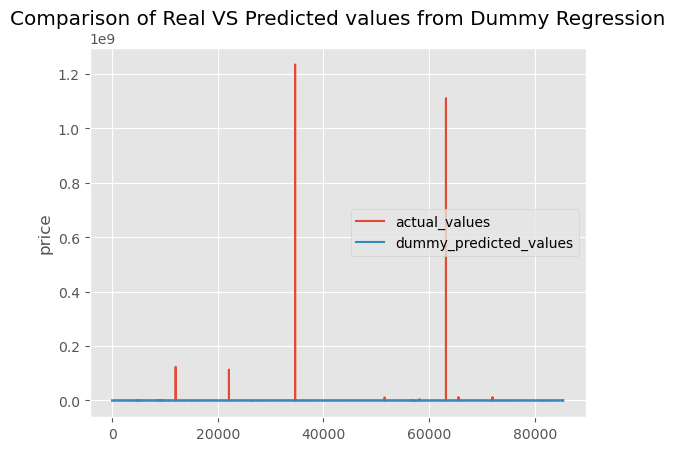

In [137]:
x = list(range(0,len(y_test)))
sns.lineplot(x=x, y = y_test, label = 'actual_values');
sns.lineplot(x=x, y = dummy_predict, label = 'dummy_predicted_values');
plt.title("Comparison of Real VS Predicted values from Dummy Regression")

Linear Regression Model

In [140]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_r2 = (lr.score(X_train, y_train))
print("The value of lr_r2 is {: 2f}".format(lr_r2))


The value of lr_r2 is  0.000127


In [142]:
lr_predict = lr.predict(X_test)
lr_rmse = mean_squared_error(y_test, lr_predict, squared =False)
print("The value of lr rmse is {: 2f}".format(lr_rmse))


The value of lr rmse is  5715380.669270


Text(0.5, 1.0, 'Comparison of Real VS Predicted values from Linear Regression')

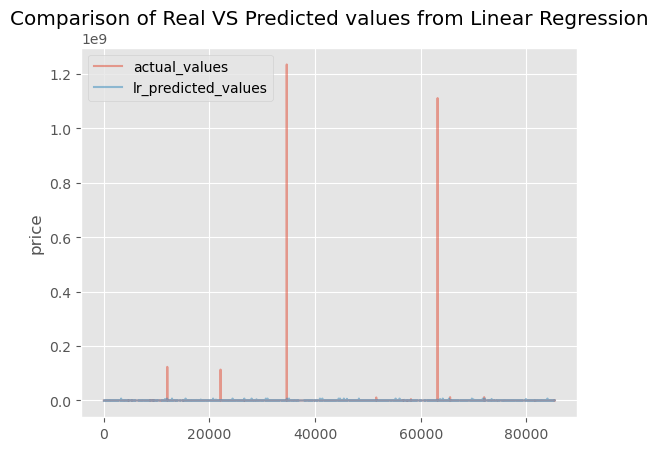

In [144]:
sns.lineplot(x=x, y=y_test, label = "actual_values", alpha = 0.5);
sns.lineplot(x=x, y = lr_predict, label = 'lr_predicted_values', alpha = 0.5);
plt.title("Comparison of Real VS Predicted values from Linear Regression")

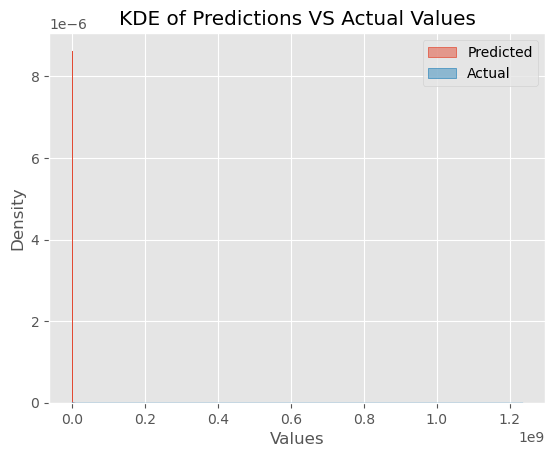

In [146]:
sns.kdeplot(lr_predict, label = 'Predicted', fill=True, alpha=0.5, bw_adjust=0.5);
sns.kdeplot(y_test, label = 'Actual', fill=True, alpha=0.5, bw_adjust=0.5);
plt.title("KDE of Predictions VS Actual Values");
plt.xlabel("Values");
plt.ylabel("Density");
plt.legend();
plt.show();


,Coefficients
odometer,0.70


<Axes: >

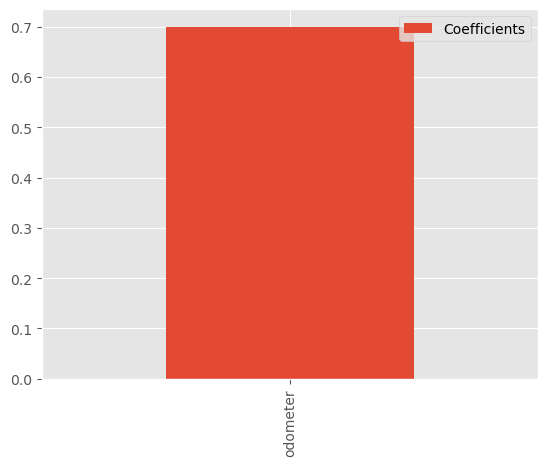

In [148]:
coeffs = pd.DataFrame(np.round(lr.coef_,1), X_train.columns, columns = ["Coefficients"])
display(coeffs)
coeffs.plot(kind = "bar")

In [150]:
df.select_dtypes("object").columns

Index(['region', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel',
       'title_status', 'transmission', 'VIN', 'drive', 'size', 'type',
       'paint_color', 'state'],
      dtype='object')

In [152]:
# This is to get dummies for all columns that is very huge and system might hang

In [154]:
#pd.get_dummies(df.select_dtypes("object"), dtype = int, drop_first = True)

In [156]:
df.select_dtypes("object").columns

Index(['region', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel',
       'title_status', 'transmission', 'VIN', 'drive', 'size', 'type',
       'paint_color', 'state'],
      dtype='object')

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
 18  pric

In [160]:
df.select_dtypes("object").agg(["nunique"])

,region,manufacturer,model,condition,cylinders,fuel,title_status,transmission,VIN,drive,size,type,paint_color,state
nunique,404,42,29649,6,8,5,6,3,118246,3,4,13,12,51


In [162]:
dfc = df[['condition', 'title_status', 'odometer']]
dfc = pd.get_dummies(dfc.select_dtypes("object"), dtype = int, drop_first = True)

In [164]:
dfc.sample(5)

,condition_fair,condition_good,condition_like new,condition_new,condition_salvage,title_status_lien,title_status_missing,title_status_parts only,title_status_rebuilt,title_status_salvage
189047,0,1,0,0,0,0,0,0,0,0
38448,0,0,0,0,0,0,0,0,0,0
304884,0,0,0,0,0,0,0,0,0,0
135376,0,0,0,0,0,0,0,0,0,0
344103,0,1,0,0,0,0,0,0,0,0


In [166]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype
---  ------                   --------------   -----
 0   condition_fair           426880 non-null  int64
 1   condition_good           426880 non-null  int64
 2   condition_like new       426880 non-null  int64
 3   condition_new            426880 non-null  int64
 4   condition_salvage        426880 non-null  int64
 5   title_status_lien        426880 non-null  int64
 6   title_status_missing     426880 non-null  int64
 7   title_status_parts only  426880 non-null  int64
 8   title_status_rebuilt     426880 non-null  int64
 9   title_status_salvage     426880 non-null  int64
dtypes: int64(10)
memory usage: 32.6 MB


In [168]:
from sklearn import set_config
set_config(transform_output="pandas")
from sklearn.impute import SimpleImputer

In [170]:
X = dfc
y = df_numeric['price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20,random_state=23)

In [172]:
print(X_train.shape)
print(X_test.shape)
print("#" * 20)
print(y_train.shape)
print(y_test.shape)

(341504, 10)
(85376, 10)
####################
(341504,)
(85376,)


In [174]:
print(X_train.isna().sum())

condition_fair             0
condition_good             0
condition_like new         0
condition_new              0
condition_salvage          0
title_status_lien          0
title_status_missing       0
title_status_parts only    0
title_status_rebuilt       0
title_status_salvage       0
dtype: int64


In [176]:
print(X_test.isna().sum())

condition_fair             0
condition_good             0
condition_like new         0
condition_new              0
condition_salvage          0
title_status_lien          0
title_status_missing       0
title_status_parts only    0
title_status_rebuilt       0
title_status_salvage       0
dtype: int64


In [178]:
from sklearn import set_config
set_config(transform_output="pandas")
from sklearn.impute import SimpleImputer

In [180]:
si = SimpleImputer(strategy = "most_frequent")
X_train = si.fit_transform(X_train)
X_test = si.transform(X_test)

In [182]:
print(X_train.isna().sum())
print(X_test.isna().sum())

condition_fair             0
condition_good             0
condition_like new         0
condition_new              0
condition_salvage          0
title_status_lien          0
title_status_missing       0
title_status_parts only    0
title_status_rebuilt       0
title_status_salvage       0
dtype: int64
condition_fair             0
condition_good             0
condition_like new         0
condition_new              0
condition_salvage          0
title_status_lien          0
title_status_missing       0
title_status_parts only    0
title_status_rebuilt       0
title_status_salvage       0
dtype: int64


In [184]:
y.mean().round(1)

75199.0

In [186]:

def ErMtx(y_train_true, y_train_pred, y_test_true, y_test_pred):
    errors = {}
    errors["Train_MAE"] = mean_absolute_error(y_train_true, y_train_pred)
    errors["Train_MSE"] = mean_squared_error(y_train_true, y_train_pred)
    errors["Train_RMAE"] = np.sqrt(errors["Train_MSE"])
    errors["Train_R2_Score"] = r2_score(y_train_true, y_train_pred)

    errors["Test_MAE"] = mean_absolute_error(y_test_true, y_test_pred)
    errors["Test_MSE"] = mean_squared_error(y_test_true, y_test_pred)
    errors["Test_RMAE"] = np.sqrt(errors["Test_MSE"])
    errors["Test_R2_Score"] = r2_score(y_test_true, y_test_pred)

    return errors
model_eval = []


In [188]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20,random_state=23)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(341504, 10)
(85376, 10)
(341504,)
(85376,)


In [190]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x_train_sc = scale.fit_transform(X_train)
x_test_sc = scale.fit_transform(X_test)

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

In [193]:
lr = LinearRegression()
lr.fit(x_train_sc, y_train)
y_train_pred = lr.predict(x_train_sc)
y_test_pred = lr.predict(x_test_sc)
error_lr = ErMtx(y_train, y_train_pred, y_test, y_test_pred)
error_lr

{'Train_MAE': 133215.12861187203,
 'Train_MSE': 177339903989370.84,
 'Train_RMAE': 13316902.942853149,
 'Train_R2_Score': 4.5370756093898734e-05,
 'Test_MAE': 99645.13295525611,
 'Test_MSE': 32638025417302.02,
 'Test_RMAE': 5712969.9296689825,
 'Test_R2_Score': 0.0002302681379972027}

In [195]:
error_lr['Model Name']='Linear Regression'
error_lr
model_evaluation = (pd.DataFrame([error_lr]))
model_evaluation

,Train_MAE,Train_MSE,Train_RMAE,Train_R2_Score,Test_MAE,Test_MSE,Test_RMAE,Test_R2_Score,Model Name
0,133215.13,177339903989370.84,13316902.94,0.00,99645.13,32638025417302.02,5712969.93,0.00,Linear Regression


In [197]:
pipe = Pipeline([
    ('scale', StandardScaler()),
    ('poly', PolynomialFeatures()),
    ('lasso', Lasso())
])

param_grid = {
    'lasso__alpha': [0.01, 0.1, 1, 10, 100],
    'poly__degree': [1,2,3,4]
}

In [199]:
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_model_lasso = grid_search.best_estimator_
print(best_model_lasso)

Pipeline(steps=[('scale', StandardScaler()),
                ('poly', PolynomialFeatures(degree=1)),
                ('lasso', Lasso(alpha=100))])


In [211]:
lasso = Lasso(alpha=100)
lasso.fit(x_train_sc, y_train)
y_train_pred = lasso.predict(x_train_sc)
y_test_pred = lasso.predict(x_test_sc)
error_lasso = ErMtx(y_train, y_train_pred, y_test, y_test_pred)
error_lasso['Model Name']='Lasso'
error_lasso


{'Train_MAE': 133129.32837528977,
 'Train_MSE': 177339904088521.44,
 'Train_RMAE': 13316902.946575884,
 'Train_R2_Score': 4.537019702000045e-05,
 'Test_MAE': 99559.86242982338,
 'Test_MSE': 32638015468750.434,
 'Test_RMAE': 5712969.058970164,
 'Test_R2_Score': 0.0002305728825588993,
 'Model Name': 'Lasso'}

In [213]:
model_evaluation = pd.concat([model_evaluation, (pd.DataFrame([error_lasso]))],ignore_index=True)
model_evaluation

,Train_MAE,Train_MSE,Train_RMAE,Train_R2_Score,Test_MAE,Test_MSE,Test_RMAE,Test_R2_Score,Model Name
0,133215.13,177339903989370.84,13316902.94,0.00,99645.13,32638025417302.02,5712969.93,0.00,Linear Regression
1,133129.33,177339904088521.44,13316902.95,0.00,99559.86,32638015468750.43,5712969.06,0.00,Lasso
2,133129.33,177339904088521.44,13316902.95,0.00,99559.86,32638015468750.43,5712969.06,0.00,Lasso


In [215]:
pipe = Pipeline([
    ('scale', StandardScaler()),
    ('poly', PolynomialFeatures()),
    ('ridge', Ridge())
])

param_grid = {
    'ridge__alpha': [0.01, 0.1, 1, 10, 100],
    'poly__degree': [1,2,3,4]
}

In [217]:
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_model_ridge = grid_search.best_estimator_
print(best_model_ridge)

Pipeline(steps=[('scale', StandardScaler()),
                ('poly', PolynomialFeatures(degree=1)),
                ('ridge', Ridge(alpha=100))])


In [221]:
best_model_ridge = Ridge(alpha=10)
best_model_ridge.fit(X_train, y_train)
y_train_pred = best_model_ridge.predict(X_train)
y_test_pred = best_model_ridge.predict(X_test)
error_ridge = ErMtx(y_train, y_train_pred, y_test, y_test_pred)
error_ridge['Model Name']='Ridge'
error_ridge

{'Train_MAE': 133187.61236065795,
 'Train_MSE': 177339904073724.75,
 'Train_RMAE': 13316902.946020322,
 'Train_R2_Score': 4.537028045326075e-05,
 'Test_MAE': 99912.45426925503,
 'Test_MSE': 32638007339477.164,
 'Test_RMAE': 5712968.347494774,
 'Test_R2_Score': 0.00023082189889045424,
 'Model Name': 'Ridge'}

In [223]:
model_evaluation = pd.concat([model_evaluation, (pd.DataFrame([error_ridge]))],ignore_index=True)
model_evaluation

,Train_MAE,Train_MSE,Train_RMAE,Train_R2_Score,Test_MAE,Test_MSE,Test_RMAE,Test_R2_Score,Model Name
0,133215.13,177339903989370.84,13316902.94,0.00,99645.13,32638025417302.02,5712969.93,0.00,Linear Regression
1,133129.33,177339904088521.44,13316902.95,0.00,99559.86,32638015468750.43,5712969.06,0.00,Lasso
2,133129.33,177339904088521.44,13316902.95,0.00,99559.86,32638015468750.43,5712969.06,0.00,Lasso
3,133187.61,177339904073724.75,13316902.95,0.00,99912.45,32638007339477.16,5712968.35,0.00,Ridge
